In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Restaurant_Reviews.tsv']


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('../input/Restaurant_Reviews.tsv',delimiter = '\t')

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


## Checking for null values

In [7]:
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

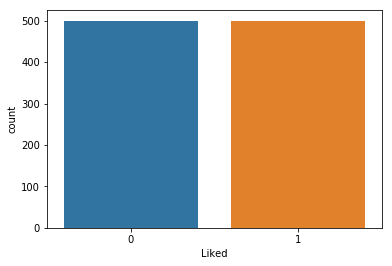

In [8]:
sns.countplot(x = dataset['Liked'],data = dataset)

In [9]:
dataset[dataset['Liked'] == 1]["Liked"].count()

500

In [10]:
dataset[dataset['Liked'] == 0]['Liked'].count()

500

In [11]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

## Data Preprocessing

In [12]:
stemmer = SnowballStemmer('english')
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    review = review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [13]:
corpus[1]

'crust good'

In [14]:
len(corpus)

1000

In [15]:
corpus[999]

'wast enough life pour salt wound draw time took bring check'

## Creating Bag of Words Model

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv = CountVectorizer(max_features=1500)

In [18]:
x = cv.fit_transform(corpus).toarray()

### Shape of the sparse matrix

In [19]:
x.shape

(1000, 1500)

In [20]:
y = dataset['Liked'].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 17)

## Naive Baye's Classifier(MultinomialNB)

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
classifier = MultinomialNB()

### Training the classifier

In [25]:
classifier.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Making Predictions

In [26]:
y_pred = classifier.predict(x_test)

In [27]:
y_train_pred = classifier.predict(x_train)

## Evaluating the classifier

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.78      0.75      0.77       105

   micro avg       0.76      0.76      0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [30]:
confusion_matrix(y_test,y_pred)

array([[73, 22],
       [26, 79]])

In [31]:
print('Training Accuray --->',accuracy_score(y_train,y_train_pred))
print('Testing Accuray --->',accuracy_score(y_test,y_pred))

Training Accuray ---> 0.9375
Testing Accuray ---> 0.76


### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(n_estimators=800)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.78      0.75      0.77       105

   micro avg       0.76      0.76      0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [35]:
confusion_matrix(y_test,y_pred)

array([[73, 22],
       [26, 79]])

In [36]:
y_train_pred = rf.predict(x_train)

In [37]:
print('Traning Accuracy --->',accuracy_score(y_train,y_train_pred))
print('Testing Accuracy --->',accuracy_score(y_test,y_pred))

Traning Accuracy ---> 0.99875
Testing Accuracy ---> 0.76


## Support Vector Classification

In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC(gamma = 'scale')

In [40]:
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
y_pred = svc.predict(x_test)

## Grid Search for SVC

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
parameters = [{'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[1,0.5,0.1,0.01,0.001]}]

In [44]:
gs = GridSearchCV(estimator=SVC(),param_grid=parameters,scoring='accuracy',cv = 10)

In [45]:
gs = gs.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [46]:
gs

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [1, 0.5, 0.1, 0.01, 0.001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [47]:
y_pred = gs.predict(x_test)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72        95
           1       0.76      0.70      0.73       105

   micro avg       0.72      0.72      0.73       200
   macro avg       0.73      0.73      0.72       200
weighted avg       0.73      0.72      0.73       200



In [49]:
confusion_matrix(y_test,y_pred)

array([[71, 24],
       [31, 74]])

In [50]:
y_train_pred = gs.predict(x_train)

In [51]:
print('Training Accuracy --->',accuracy_score(y_train,y_train_pred))
print('Testing Accuracy --->',accuracy_score(y_test,y_pred))

Training Accuracy ---> 0.94625
Testing Accuracy ---> 0.725
